In [1]:
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, explained_variance_score
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Genera dos DataFrames para entrenar y testear
# El primero tiene todas las columnas de características
# El segundo solo tiene la columna de la variable objetivo
def split_objective(input_df, dims):
    features = input_df.loc[:, input_df.columns != list(dims.keys())[-1]]
    objective = input_df[input_df.columns[-1:]]
    return (features, objective)

In [2]:
# campos a utilizar
# Extrae los datos del CSV
# el DataFrame generado convierte los datos categóricos en valores
# numéricos que pueden ser operados por cualquier algoritmo
def preparar_datos(dimensiones, archivo='6to.csv'):
    df = pd.read_csv(
        archivo,
        encoding = "ISO-8859-1",
        usecols=list(dimensiones.keys()),
        dtype=dimensiones)
    # eliminar valores nulos
    df.replace('', 0, regex=True)
    
    factores = [x for x, y in df.dtypes.items() if str(y) == 'category']
    for factor in factores:
        le = preprocessing.LabelEncoder()
        le.fit(df[factor])
        df[factor] = le.transform(df[factor])
    return df

In [6]:
def comparar_modelos():
    dimensiones = {
        'Edad': 'int',
        'Etnia_Recode': 'category',
        'P61_Te_Han_Esenado_Utilizar_Calculadora': 'category',
        'P63_Ensayo_Y_Error': 'category',
        'P63_Buscar_Un_Patron': 'category',
        'P59_Gusta_Resolver_Ejercicios_Matematicas': 'category',
        'P63_Ensayo_Y_Error': 'category',
        'P63_Buscar_Un_Patron': 'category',
        'P63_Rosolver_Un_Problema_Similar_Pero_Mas_Simple': 'category',
        'P63_Hacer_Un_Diagrama': 'category',
        'P63_Usar_Razonamiento_Indirecto': 'category',
        'P63_Usar_Casos': 'category',
        'P63_Rosolver_Un_Problema_Equivalente': 'category',
        'P63_Buscar_Una_Formula': 'category',
        'P63_Usar_Analisis_Dimensionales': 'category',
        'P63_Usar_Coordenadas': 'category',
        'P63_Usar_Una_Variable': 'category',
        'P63_Usar_Una_Lista': 'category',
        'P63_Hacer_Una_Figura': 'category',
        'P63_Usar_Razonamiento_Directo': 'category',
        'P63_Usar_Las_Propiedades_De_Los_Numeros': 'category',
        'P63_Trabajar_Hacia_Atras': 'category',
        'P63_Resolver_Una_Educacion': 'category',
        'P63_Usar_Un_Modelo': 'category',
        'P63_Identificar_Submeta': 'category',
        'P63_Usar_Simetria': 'category',
        'LOGRO_MATE': 'category'
    }
    # Leer del CSV
    df = pd.read_csv(
        '6to.csv',
        encoding = "ISO-8859-1",
        usecols=list(dimensiones.keys()),
        dtype=dimensiones)
    # eliminar valores nulos
    df.replace('', 0, regex=True)

    # Convertir factores (como strings) en numeros
    factores = [x for x, y in df.dtypes.items() if str(y) == 'category']
    for factor in factores:
        le = preprocessing.LabelEncoder()
        le.fit(df[factor])
        df[factor] = le.transform(df[factor])

    df_train, df_test = train_test_split(df, test_size=0.2)
    seed = 7
    
    models = [
        ('RF', RandomForestClassifier(n_estimators=1000)),
        ('SVM', SVC()),
        ('LR', LogisticRegression()),
        ('LDA', LinearDiscriminantAnalysis()),
        ('CART', DecisionTreeClassifier()),
        ('KNN', KNeighborsClassifier())
    ]
    resultado = []
    for name, modelo in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        try:

            cv_results = model_selection.cross_val_score(
                modelo,
                df.loc[:, df.columns != list(dimensiones.keys())[-1]].values,
                df[df.columns[-1:]].values.ravel(),
                cv=kfold,
                scoring='accuracy')
            resultado.append(cv_results)
            mensaje = '{}: {} ({})'.format(name, cv_results.mean(), cv_results.std())
            print(mensaje)
        except ValueError as e:
            print(e)
comparar_modelos()

RF: 0.5781829140915602 (0.01866626582487565)
SVM: 0.6084786982007726 (0.034273654502426615)
LR: 0.6046237793862916 (0.03279576642250505)
LDA: 0.6047323275305342 (0.03225641939240576)
CART: 0.5488108360595696 (0.022054262221462055)
KNN: 0.5614055171120356 (0.023765897728856063)


In [3]:
# RANDOM FOREST
# separar datos de prueba y de entrenamiento
def crear_random_forest(input_df, dimensiones):

    df_train, df_test = train_test_split(input_df, test_size=0.2)

    train_obj = df_train[df_train.columns[-1:]]

    train_features, train_objective = split_objective(df_train, dimensiones)
    test_features, test_objective = split_objective(df_train, dimensiones)

    clf = RandomForestClassifier(n_estimators=1000)
    print('Entrenando...')
    clf.fit(
        train_features.values,
        train_objective.values.ravel())
    print('Entrenamiento finalizado')
    predict = clf.predict(test_features.values)
    accuracy = accuracy_score(test_objective.values, predict)
    print('Punteo: {}'.format(clf.score(test_features, test_objective)))
    feats = {}
    for feature, importance in zip(train_features.columns, clf.feature_importances_):
        feats[feature] = importance * 100
    return clf, accuracy, feats

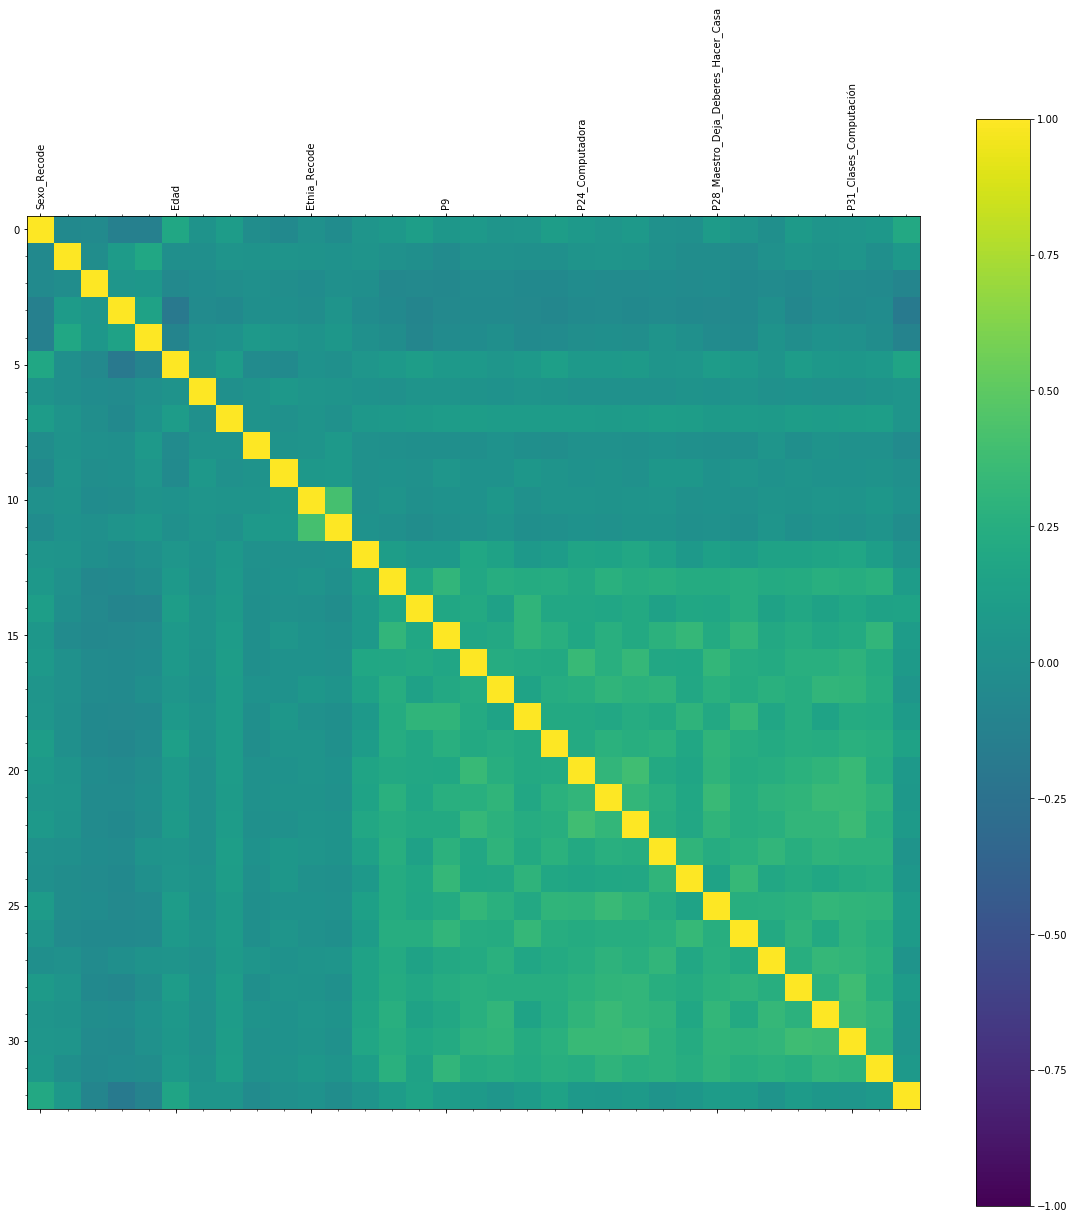

Entrenando...
Entrenamiento finalizado
Punteo: 0.9645038686032307


In [4]:
def probar_random_forest():
    rf_dimensiones = {
        'Area': 'category',
        'Sexo_Recode': 'category',
        'Edad': 'int',
        'Etnia_Recode': 'category',
        'P9': 'category',
        'P24_Computadora': 'category',
        'P28_Maestro_Deja_Deberes_Hacer_Casa': 'category',
        'P31_Clases_Computación': 'category',
        'P37_Te_Tratan_Mal_Escuela': 'category',
        'P61_Te_Han_Esenado_Utilizar_Calculadora': 'category',
        'P62_Utilizas_Calculadora_Clase_Matematicas': 'category',
        'P59_Gusta_Resolver_Ejercicios_Matematicas': 'category',
        'P63_Ensayo_Y_Error': 'category',
        'P63_Buscar_Un_Patron': 'category',
        'P63_Rosolver_Un_Problema_Similar_Pero_Mas_Simple': 'category',
        'P63_Hacer_Un_Diagrama': 'category',
        'P63_Usar_Razonamiento_Indirecto': 'category',
        'P63_Usar_Casos': 'category',
        'P63_Rosolver_Un_Problema_Equivalente': 'category',
        'P63_Buscar_Una_Formula': 'category',
        'P63_Usar_Analisis_Dimensionales': 'category',
        'P63_Usar_Coordenadas': 'category',
        'P63_Usar_Una_Variable': 'category',
        'P63_Usar_Una_Lista': 'category',
        'P63_Hacer_Una_Figura': 'category',
        'P63_Usar_Razonamiento_Directo': 'category',
        'P63_Usar_Las_Propiedades_De_Los_Numeros': 'category',
        'P63_Trabajar_Hacia_Atras': 'category',
        'P63_Resolver_Una_Educacion': 'category',
        'P63_Usar_Un_Modelo': 'category',
        'P63_Identificar_Submeta': 'category',
        'P63_Usar_Simetria': 'category',
        'DESEMPENO_MATE': 'category',
    }
    
    rf_3ro = {
        'Cod_Area': 'category',
        'Sexo_Recode': 'category',
        'Edad': 'int',
        'Etnia_Recode': 'category',
        'Repetido_Grado': 'category',
        'P_6': 'category',
        'P_19_Computadora': 'category',
        'S4_4_Maestro_Deja_Deberes_Hacer_Casa': 'category',
        'S4_5_Maestro_Devuelve_Deberes_Calificaciones': 'category',
        'S4_6_Maestro_Devuelve_Trabajos_Revisados': 'category',
        'S4_9_Alguien_Molesta_Mucho': 'category',
        'S4_10_Maestro_Llamado_Atencion_Alguna_Vez': 'category',
        'S4_11_Maestro_Castigado_Alguna_Vez': 'category',
        'S4_12_Lastimado_Alguien_Escuela': 'category',
        'S4_13_Te_Tratan_Mal_Escuela': 'category',
        'DESEMPENO_MATE': 'category'
    }
    rf_df = preparar_datos(rf_dimensiones)
    # rf_df = preparar_datos(rf_3ro, '3RO2014.csv')
    
    # Preparar gráfico
    correlations = rf_df.corr()
    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(111)
    cax = ax.matshow(correlations, vmin=-1, vmax=1)
    fig.colorbar(cax)
    ax.set_xticks(range(0, len(rf_dimensiones.keys())), rf_dimensiones.keys())
    ax.set_yticks(range(len(rf_dimensiones.keys())), rf_dimensiones.keys())
    ax.set_xticklabels(rf_dimensiones.keys(), rotation=90)
    # ax.set_yticklabels(rf_dimensiones.keys())
    plt.show()
    
    # Separar los datos
    train_features, train_objective = split_objective(rf_df, rf_dimensiones)
    # crear y entrenar random forest
    rf_clf, rf_accuracy, rf_importances = crear_random_forest(rf_df, rf_dimensiones)
    
    return rf_clf, rf_accuracy, rf_importances

rf_clf, rf_accuracy, rf_dimensiones = probar_random_forest()

Precision: 0.9645038686032307


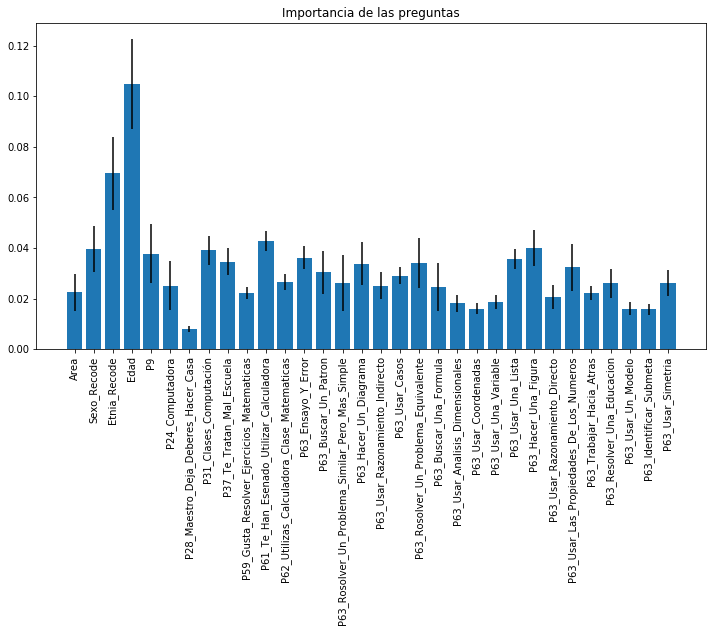

In [5]:
import matplotlib.pyplot as plt
print('Precision: {}'.format(rf_accuracy))
importance = rf_clf.feature_importances_
importance = pd.DataFrame(
    importance,
    index=list(rf_dimensiones.keys()),
    columns=['Importance']
)
importance['Std'] = np.std(
    [tree.feature_importances_ for tree in rf_clf.estimators_],
    axis=0
)

x = range(importance.shape[0])
y = importance.iloc[:, 0]
yerr = importance.iloc[:, 1]

plt.figure(figsize=(12,6))
plt.title('Importancia de las preguntas')
plt.bar(x, y, yerr=yerr, align="center")
plt.xticks(x, rf_dimensiones.keys(), rotation=90)
plt.show()